# How to visualize IBD output
This notebook gives examples how to use ancIBD visualization code. Get the most out of your IBD calls by using crisp visualizations out of the box!

In [1]:
### First do some Imports
import sys as sys
import matplotlib.cm as cm
import pandas as pd

### The following code gives nice and clean Arial font on your plots
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']

### The following Code sets the working directory to your ancIBD code
sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/package/ancIBD/")  # hack to get development package first in path

# A) Run the IBD caller for a pair of chromosomes
This functions runs and visualizes IBD along a pair of chromosomes. This function is very useful to manually inspect IBD calls. As calling IBD for a pair of chromosomes is very quick, this only needs a few seconds.

The value of this plotting function cannot be overstressed - it allows one to manually inspect the data behind an IBD call. Importantly, it visualizes the genomic distribution of opposing homozygotes. This are markers where both indivdiuals have homozygote for a different allele - and those markers rule out being in IBD. Observing long gaps without such markers is a strong signal for IBD - and is implicitly used by the IBD caller.

In the plot below, the blue bars on top of the plot are the inferred IBD. The maroon line is the posterior.
The dots on top or the bottom visualize an opposing homozygote (up: yes, down: no). Only SNPs where both individuals have Genotype Probability > 0.99 for the maximum likelihood genotype are visualized.

In [2]:
from run import run_plot_pair

Filtering to 0.99 GP variants: 0.954x
Filtering to 0.99 GP variants: 0.848x
Filtering to common GP variants: 0.827x
Plotting 69063 markers


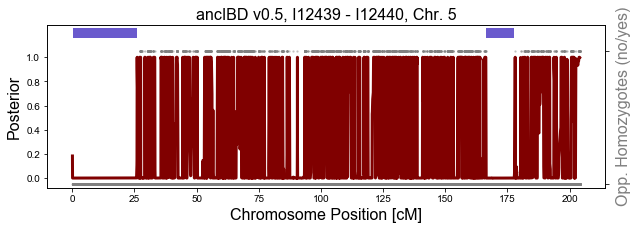

In [3]:
iids = ["I12439", "I12440"]	

run_plot_pair(iids=iids, ch=5, plot=True, xlim=[],
              path_h5 = "/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/1240k_v51.1/ch" ,
              min_cm=6, p_col='variants/AF_ALL', ms=1.5,
              path_fig="", fs_l=16, figsize=(10,3))

# Plot Karyotype Plot of IBD
This function depicts IBD between a pair of indivdiuals along their chromosomes.

It needs that ancIBD output with a table of IBD (including their start and end) exists. 

In [4]:
from plot.plot_karyotype import plot_karyo_from_ibd_df

### Load the IBD Data
This is the output from ancIBD. This output is a tabular seperated table (.tsv) file that includes the genomic start and end position of each inferred IBD block.

In [5]:
path_ibd = "/n/groups/reich/hringbauer/git/ibd_euro/output/ibd/ibd220.ibd.v51.1.tsv"
df_ibd = pd.read_csv(path_ibd, sep="\t")

Found: 7 Pairs fitting in dataframe.



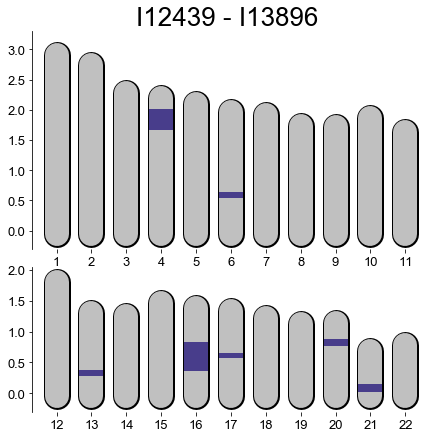

In [6]:
plot_karyo_from_ibd_df(df_ibd, iids=["I12439", "I13896"], min_cm=8, savepath="", 
                       title="I12439 - I13896")

# Plot the Length Distribution of IBD for a pair of indvidiuals
Plotting the length distribution can be useful to evalutate different possible kinships that produce a pair of individuals with multiple IBD. Note: Beyond third degree, there simply is biological variation and overlap between different classes of relatives.

### Expert Note: 
The comm_ancs, ms, and labels keywords are optional. They can be changed to show the expectations for various types of relationships.
- ms: Number of seperating meiosis. The number of generations between the relates. E.g. 4 for first cousins. For directly ancestral there is an additional complication - recombination breakpoints in the ancestor are not seen in inferred IBD - so set m one genaration less.
- comm_ancs: Number of common ancestral haplotypes. For a directly ancestral relationship or a hal-sib this is 2. For a relationship via two parents (e.g. siblings of nephew-aunt) it is 4.

In [8]:
from plot.plot_karyotype import plot_pde_individual_from_ibd_df

Found: 18 Pairs fitting in dataframe.



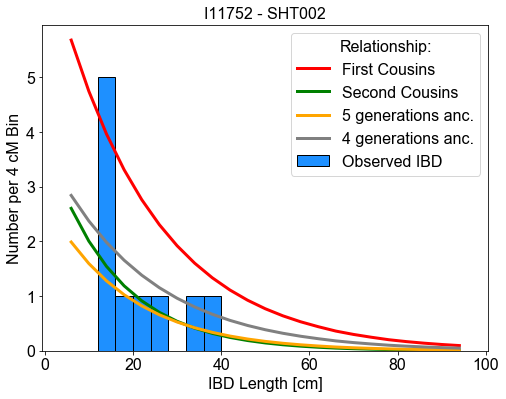

In [10]:
plot_pde_individual_from_ibd_df(df_ibd, iids=["I11752", "SHT002"],
                                savepath="", title="I11752 - SHT002",
                                comm_ancs=[4, 4, 2, 2], ms=[4, 6, 5, 4],
                                labels=['First Cousins', 'Second Cousins', '5 generations anc.', '4 generations anc.'],)